### Data Preparing
Pada tahap ini, dilakukan beberapa data preparation tambahan, diantaranya dengan one-hot encoding fitur kategorikal dan juga melakukan beberapa teknik penanganan imbalance dataset menggunakan oversampling dan weighting pada label

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('vers3-SBAnational.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297340 entries, 0 to 297339
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              297340 non-null  object 
 1   NAICS              297340 non-null  int64  
 2   ApprovalFY         297340 non-null  float64
 3   Term               297340 non-null  float64
 4   NoEmp              297340 non-null  float64
 5   NewExist           297340 non-null  float64
 6   CreateJob          297340 non-null  float64
 7   RetainedJob        297340 non-null  float64
 8   UrbanRural         297340 non-null  float64
 9   LowDoc             297340 non-null  object 
 10  DisbursementGross  297340 non-null  float64
 11  Default            297340 non-null  int64  
 12  GrAppv             297340 non-null  float64
 13  SBA_Appv           297340 non-null  float64
 14  HasFranchise       297340 non-null  int64  
 15  RealEstate         297340 non-null  int64  
dtypes:

In [3]:
df.head()

,State,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,Default,GrAppv,SBA_Appv,HasFranchise,RealEstate
0,NC,44,2006.0,162.0,2.0,2.0,0.0,0.0,1.0,N,253400.0,0,253400.0,190050.0,1,0
1,AR,72,2006.0,126.0,7.0,1.0,0.0,0.0,1.0,N,137300.0,0,137300.0,116705.0,0,0
2,LA,53,2006.0,60.0,3.0,1.0,0.0,0.0,1.0,N,50000.0,0,50000.0,42500.0,0,0
3,TN,44,2006.0,84.0,4.0,1.0,1.0,4.0,1.0,N,20000.0,0,20000.0,17000.0,0,0
4,MD,44,2006.0,84.0,1.0,2.0,0.0,1.0,1.0,N,10000.0,0,10000.0,8500.0,0,0


In [4]:
df_encoded = pd.get_dummies(df, columns=['State', 'NAICS'])
df_encoded.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,Default,...,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
0,2006.0,162.0,2.0,2.0,0.0,0.0,1.0,N,253400.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006.0,126.0,7.0,1.0,0.0,0.0,1.0,N,137300.0,0,...,0,0,0,0,0,0,0,1,0,0
2,2006.0,60.0,3.0,1.0,0.0,0.0,1.0,N,50000.0,0,...,1,0,0,0,0,0,0,0,0,0
3,2006.0,84.0,4.0,1.0,1.0,4.0,1.0,N,20000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,84.0,1.0,2.0,0.0,1.0,1.0,N,10000.0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_encoded['LowDoc'] = df_encoded['LowDoc'].map({'N': 0, 'Y': 1})

In [6]:
# Separate features and labels
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

# Stratify data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_test, X_production, y_test, y_production = train_test_split(X_test, y_test, test_size=0.001, stratify=y_test, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_production = scaler.transform(X_production)

In [7]:
new_df = df_encoded.copy()

# Calculate the percentage
new_df['SBA Coverage'] = (new_df['SBA_Appv'] / new_df['DisbursementGross']) * 100

# Print the updated DataFrame
new_df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,Default,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,SBA Coverage
0,2006.0,162.0,2.0,2.0,0.0,0.0,1.0,0,253400.0,0,...,0,0,0,0,0,0,0,0,0,75.0
1,2006.0,126.0,7.0,1.0,0.0,0.0,1.0,0,137300.0,0,...,0,0,0,0,0,0,1,0,0,85.0
2,2006.0,60.0,3.0,1.0,0.0,0.0,1.0,0,50000.0,0,...,0,0,0,0,0,0,0,0,0,85.0
3,2006.0,84.0,4.0,1.0,1.0,4.0,1.0,0,20000.0,0,...,0,0,0,0,0,0,0,0,0,85.0
4,2006.0,84.0,1.0,2.0,0.0,1.0,1.0,0,10000.0,0,...,0,0,0,0,0,0,0,0,0,85.0


In [8]:
new_df = new_df.drop(['ApprovalFY', 'GrAppv', 'SBA_Appv'], axis = 1)

In [9]:
new_df.columns

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural',
       'LowDoc', 'DisbursementGross', 'Default', 'HasFranchise', 'RealEstate',
       'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY', 'NAICS_0', 'NAICS_11', 'NAICS_21',
       'NAICS_22', 'NAICS_23', 'NAICS_31', 'NAICS_42', 'NAICS_44', 'NAICS_48',
       'NAICS_51', 'NAICS_52', 'NAICS_53', 'NAICS_54',

In [10]:
X_new = new_df.drop(['Default'], axis=1)
y_new = new_df['Default']

# Stratify data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, stratify=y_new, random_state=42)
X_test_new, X_prod_new, y_test_new, y_prod_new = train_test_split(X_test_new, y_test_new, test_size=0.001, stratify=y_test_new, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)
#X_prod_new = scaler.transform(X_prod_new)

In [ ]:
import pickle
with open('pre_process_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

#### Oversampling

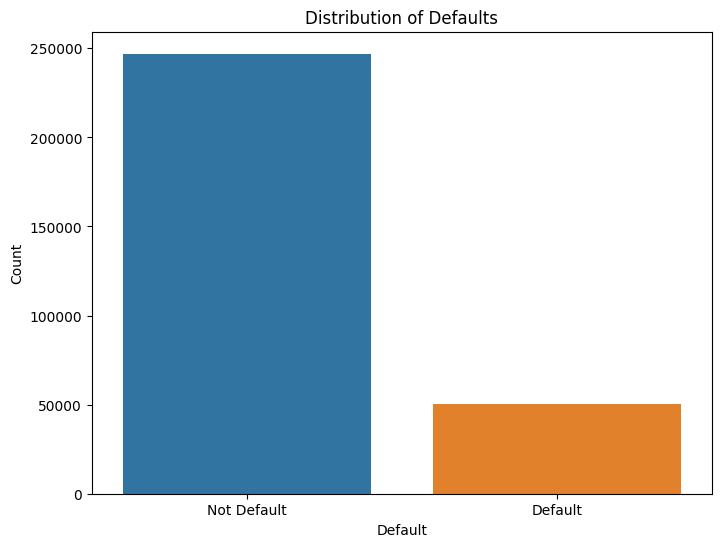

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each default class
default_counts = df_encoded['Default'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values)
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Default', 'Default'])
plt.title('Distribution of Defaults')
plt.show()


In [ ]:
# ADASYN
adasyn_oversampler = ADASYN(random_state=42)
X_adasyn_oversampled, y_adasyn_oversampled = adasyn_oversampler.fit_resample(X_train, y_train)

In [ ]:
# SMOTE
smote_oversampler = SMOTE(random_state=42)
X_smote_oversampled, y_smote_oversampled = smote_oversampler.fit_resample(X_train, y_train)

In [ ]:
# ADASYN
X_adasyn_new, y_adasyn_new = adasyn_oversampler.fit_resample(X_train_new, y_train_new)

In [12]:
# SMOTE
smote_oversampler = SMOTE(random_state=42)
X_smote_new, y_smote_new = smote_oversampler.fit_resample(X_train_new, y_train_new)

#### Stratified Cross Validation

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import label_binarize

def perform_stratified_cv(X_train, y_train, X_test, y_test, model):
    # Convert y_train and y_test to binary labels
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

    # Perform stratified cross-validation on the training set
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    cv_scores = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train_bin[train_index], y_train_bin[val_index]

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

        y_val_pred_prob = model.predict(X_val_fold)
        y_val_pred = (y_val_pred_prob > 0.5).astype(int)
        f1_score_val = f1_score(y_val_fold, y_val_pred, average='macro')
        cv_scores.append(f1_score_val)

    # Display the cross-validation results
    print("Cross-Validation F1 Score: ", np.mean(cv_scores))

    # Fit the model on the full training set
    # model.fit(X_train, y_train_bin)

    # Predict on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate loss in the test set
    test_loss = model.evaluate(X_test, y_test_bin)

    # Display evaluation metrics, confusion matrix, and test loss
    print("Classification Report:")
    print(classification_report(y_test_bin, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test_bin, y_pred)
    print(cm)

    print("Test Loss:", test_loss)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

### Modeling

In [ ]:
# Build the neural network model
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
perform_stratified_cv(X_adasyn_oversampled, y_adasyn_oversampled, X_test, y_test, model_1)

In [ ]:
perform_stratified_cv(X_smote_oversampled, y_smote_oversampled, X_test, y_test, model_1)

In [ ]:
# Build the neural network model
model_2 = Sequential()
model_2.add(Dense(16, activation='relu', input_shape=(X_train_new.shape[1],)))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

2174/2174 [==============================] - 4s 2ms/step
Cross-Validation F1 Score:  0.8217070313521144
2785/2785 [==============================] - 5s 2ms/step - loss: 0.4172 - accuracy: 0.8045
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     74018
           1       0.46      0.87      0.60     15094

    accuracy                           0.80     89112
   macro avg       0.71      0.83      0.74     89112
weighted avg       0.88      0.80      0.82     89112

Confusion Matrix:
[[58621 15397]
 [ 2028 13066]]
Test Loss: [0.41724225878715515, 0.8044595718383789]


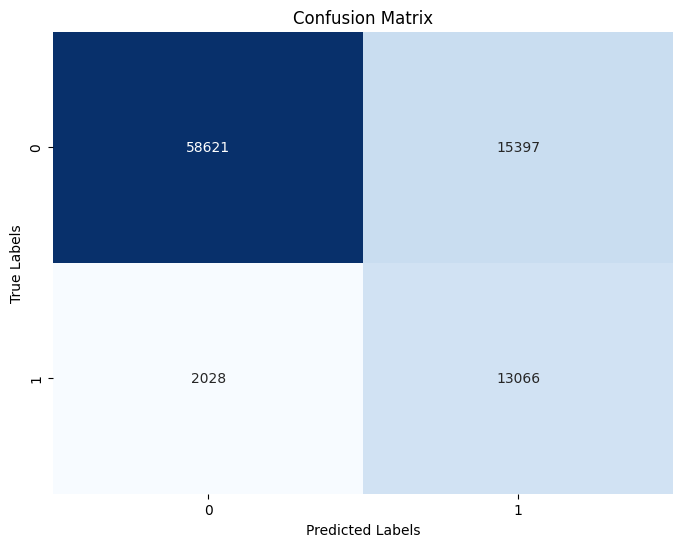

In [ ]:
perform_stratified_cv(X_adasyn_new, y_adasyn_new, X_test_new, y_test_new, model_2)

2162/2162 [==============================] - 3s 1ms/step
Cross-Validation F1 Score:  0.8518433956228231
2785/2785 [==============================] - 5s 2ms/step - loss: 0.3753 - accuracy: 0.8338
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     74018
           1       0.51      0.83      0.63     15094

    accuracy                           0.83     89112
   macro avg       0.73      0.83      0.76     89112
weighted avg       0.88      0.83      0.85     89112

Confusion Matrix:
[[61763 12255]
 [ 2553 12541]]
Test Loss: [0.37534815073013306, 0.8338270783424377]


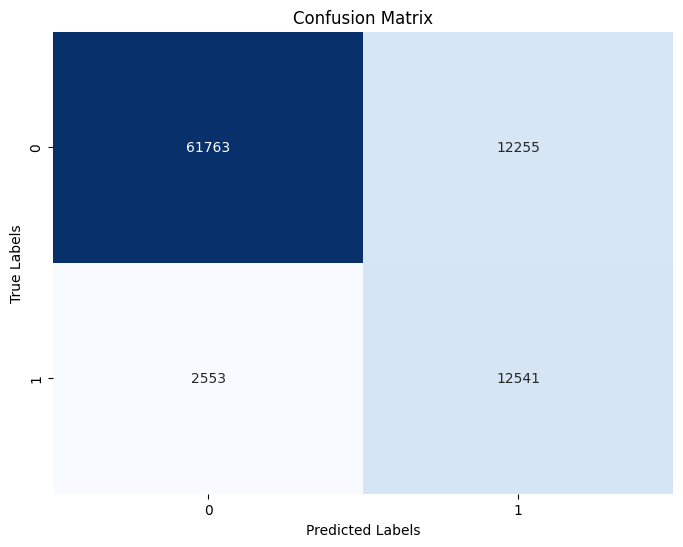

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_2)

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_shape=(X_train_new.shape[1],)))
model_3.add(BatchNormalization())
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 4s 2ms/step
Cross-Validation F1 Score:  0.8492654670247919
2785/2785 [==============================] - 5s 2ms/step - loss: 0.3479 - accuracy: 0.8476
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     74018
           1       0.53      0.81      0.64     15094

    accuracy                           0.85     89112
   macro avg       0.75      0.83      0.77     89112
weighted avg       0.89      0.85      0.86     89112

Confusion Matrix:
[[63235 10783]
 [ 2796 12298]]
Test Loss: [0.34790804982185364, 0.8476186990737915]


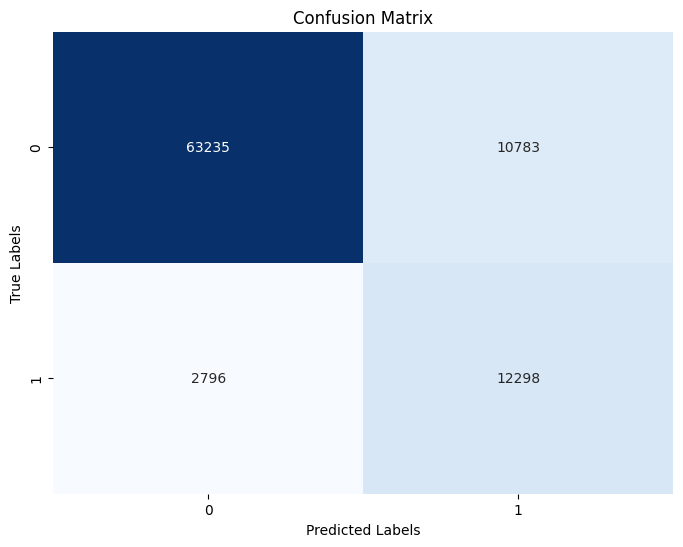

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_3)

In [ ]:
model_4 = Sequential()
model_4.add(Dense(16, activation='relu', input_shape=(X_train_new.shape[1],)))
model_4.add(Dense(64, activation='sigmoid'))
model_4.add(Dense(64, activation='tanh'))
model_4.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 4s 2ms/step
Cross-Validation F1 Score:  0.87109838950513
2785/2785 [==============================] - 6s 2ms/step - loss: 0.3220 - accuracy: 0.8540
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     74018
           1       0.54      0.86      0.67     15094

    accuracy                           0.85     89112
   macro avg       0.76      0.86      0.79     89112
weighted avg       0.90      0.85      0.87     89112

Confusion Matrix:
[[63129 10889]
 [ 2121 12973]]
Test Loss: [0.32195135951042175, 0.8540039658546448]


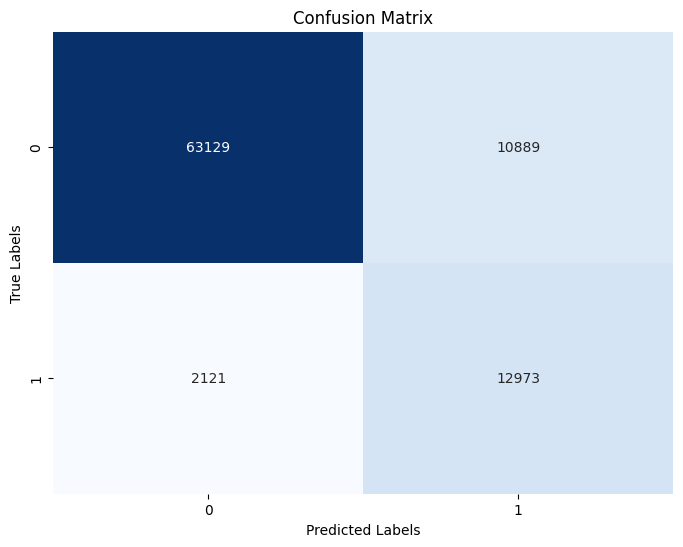

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_4)

In [ ]:
model_5 = Sequential()
model_5.add(Dense(16, activation='relu', input_shape=(X_train_new.shape[1],)))
model_5.add(Dense(64, activation='sigmoid'))
model_5.add(Dropout(0.2))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 3s 1ms/step
Cross-Validation F1 Score:  0.8573061001052584
2785/2785 [==============================] - 6s 2ms/step - loss: 0.3320 - accuracy: 0.8559
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     74018
           1       0.55      0.85      0.67     15094

    accuracy                           0.86     89112
   macro avg       0.76      0.85      0.79     89112
weighted avg       0.90      0.86      0.87     89112

Confusion Matrix:
[[63394 10624]
 [ 2217 12877]]
Test Loss: [0.3320315182209015, 0.8559004664421082]


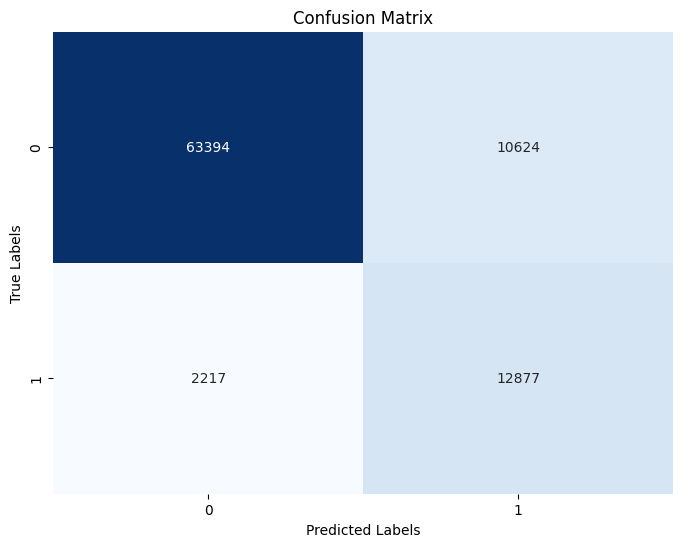

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_5)

In [ ]:
model_6 = Sequential()
model_6.add(Dense(128, activation='relu', input_shape=(X_train_new.shape[1],)))
model_6.add(Dense(256, activation='sigmoid'))
model_6.add(Dense(256, activation='tanh'))
model_6.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 5s 2ms/step
Cross-Validation F1 Score:  0.8999384061982335
2785/2785 [==============================] - 7s 2ms/step - loss: 0.4248 - accuracy: 0.8551
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     74018
           1       0.55      0.78      0.65     15094

    accuracy                           0.86     89112
   macro avg       0.75      0.83      0.78     89112
weighted avg       0.88      0.86      0.86     89112

Confusion Matrix:
[[64386  9632]
 [ 3280 11814]]
Test Loss: [0.42475900053977966, 0.8551036715507507]


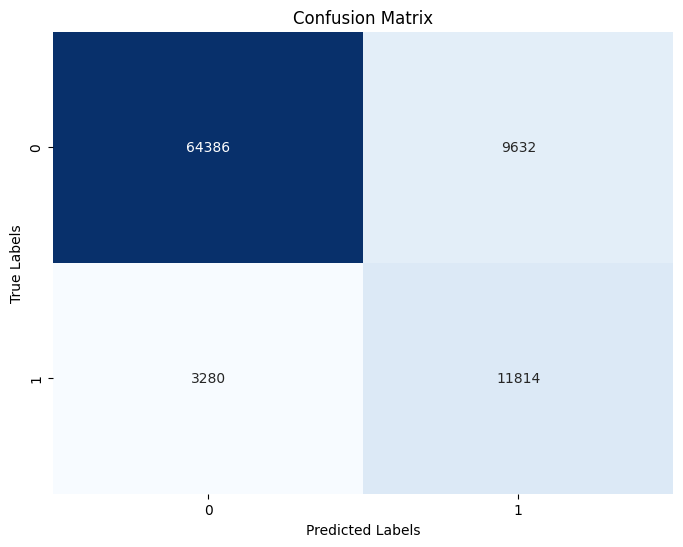

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_6)

In [27]:
model_7 = Sequential()
model_7.add(Dense(16, activation='relu', input_shape=(83,)))
model_7.add(Dense(64, activation='sigmoid'))
model_7.add(Dropout(0.2))
model_7.add(Dense(64, activation='tanh'))
model_7.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 4s 2ms/step
Cross-Validation F1 Score:  0.8620984726908547
2785/2785 [==============================] - 5s 2ms/step - loss: 0.3118 - accuracy: 0.8602
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     74018
           1       0.56      0.85      0.67     15094

    accuracy                           0.86     89112
   macro avg       0.76      0.86      0.79     89112
weighted avg       0.90      0.86      0.87     89112

Confusion Matrix:
[[63788 10230]
 [ 2229 12865]]
Test Loss: [0.31179627776145935, 0.8601871728897095]


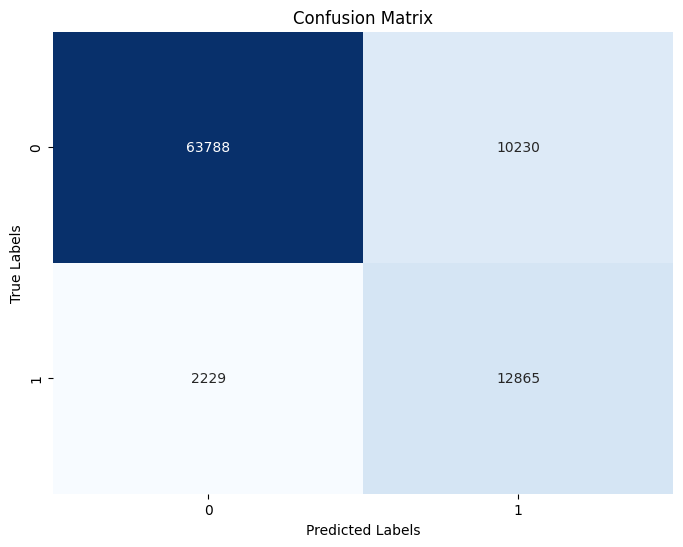

In [30]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_7)

In [33]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_7_rev = Sequential()
model_7_rev.add(Dense(16, activation='relu'))
model_7_rev.add(Dense(64, activation='sigmoid'))
model_7_rev.add(Dropout(0.2))
model_7_rev.add(Dense(64, activation='tanh'))
model_7_rev.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 4s 2ms/step
Cross-Validation F1 Score:  0.8604251718361843
2785/2785 [==============================] - 7s 2ms/step - loss: 0.3110 - accuracy: 0.8538
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     74018
           1       0.54      0.87      0.67     15094

    accuracy                           0.85     89112
   macro avg       0.76      0.86      0.79     89112
weighted avg       0.90      0.85      0.87     89112

Confusion Matrix:
[[62907 11111]
 [ 1920 13174]]
Test Loss: [0.3109886348247528, 0.8537682890892029]


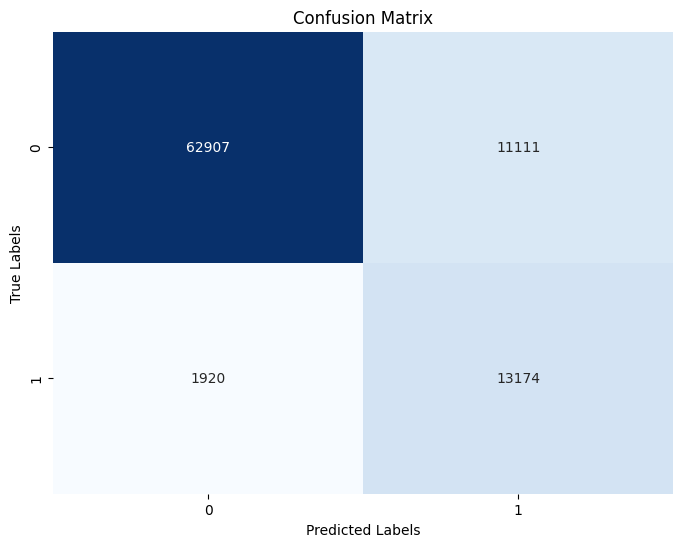

In [37]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_7_rev)

In [ ]:
model_8 = Sequential()
model_8.add(Dense(32, activation='relu', input_shape=(X_train_new.shape[1],)))
model_8.add(Dense(64, activation='tanh'))
model_8.add(Dropout(0.2))
model_8.add(Dense(64, activation='tanh'))
model_8.add(Dense(1, activation='sigmoid'))

2162/2162 [==============================] - 3s 1ms/step
Cross-Validation F1 Score:  0.8698262062822562
2785/2785 [==============================] - 5s 2ms/step - loss: 0.3178 - accuracy: 0.8625
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     74018
           1       0.56      0.84      0.67     15094

    accuracy                           0.86     89112
   macro avg       0.76      0.85      0.79     89112
weighted avg       0.90      0.86      0.87     89112

Confusion Matrix:
[[64139  9879]
 [ 2372 12722]]
Test Loss: [0.3178446888923645, 0.8625213503837585]


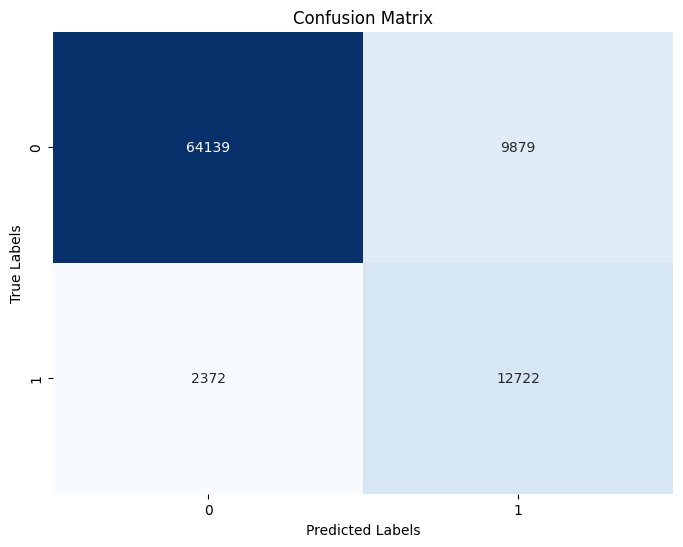

In [ ]:
perform_stratified_cv(X_smote_new, y_smote_new, X_test_new, y_test_new, model_8)

### Modeling Andre

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

shape = X_train.shape[1]

model=Sequential()
model.add(Dense(129, activation='relu', input_shape=(X_train_new.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
     

In [ ]:
class cb(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_loss') < 0.4 and logs.get('loss') < 0.4 and logs.get('val_accuracy') > 0.80):
      self.model.stop_training = True

callbacks = cb()

In [ ]:
model.fit(X_smote_new, y_smote_new, validation_data=(X_test_new, y_test_new), batch_size=20, epochs=100, verbose=1, callbacks=[callbacks])

### Feature Importance

In [ ]:
# Exclude the "default" column
column_names_new = np.array([col for col in X_new.columns])
print(column_names_new)

['Term' 'NoEmp' 'NewExist' 'CreateJob' 'RetainedJob' 'UrbanRural' 'LowDoc'
 'DisbursementGross' 'HasFranchise' 'RealEstate' 'State_AK' 'State_AL'
 'State_AR' 'State_AZ' 'State_CA' 'State_CO' 'State_CT' 'State_DC'
 'State_DE' 'State_FL' 'State_GA' 'State_HI' 'State_IA' 'State_ID'
 'State_IL' 'State_IN' 'State_KS' 'State_KY' 'State_LA' 'State_MA'
 'State_MD' 'State_ME' 'State_MI' 'State_MN' 'State_MO' 'State_MS'
 'State_MT' 'State_NC' 'State_ND' 'State_NE' 'State_NH' 'State_NJ'
 'State_NM' 'State_NV' 'State_NY' 'State_OH' 'State_OK' 'State_OR'
 'State_PA' 'State_RI' 'State_SC' 'State_SD' 'State_TN' 'State_TX'
 'State_UT' 'State_VA' 'State_VT' 'State_WA' 'State_WI' 'State_WV'
 'State_WY' 'NAICS_0' 'NAICS_11' 'NAICS_21' 'NAICS_22' 'NAICS_23'
 'NAICS_31' 'NAICS_42' 'NAICS_44' 'NAICS_48' 'NAICS_51' 'NAICS_52'
 'NAICS_53' 'NAICS_54' 'NAICS_55' 'NAICS_56' 'NAICS_61' 'NAICS_62'
 'NAICS_71' 'NAICS_72' 'NAICS_81' 'NAICS_92' 'SBA Coverage']


In [ ]:
for index, col in enumerate(X_new.columns):
    print(f"{index} - {col}")

0 - Term
1 - NoEmp
2 - NewExist
3 - CreateJob
4 - RetainedJob
5 - UrbanRural
6 - LowDoc
7 - DisbursementGross
8 - HasFranchise
9 - RealEstate
10 - State_AK
11 - State_AL
12 - State_AR
13 - State_AZ
14 - State_CA
15 - State_CO
16 - State_CT
17 - State_DC
18 - State_DE
19 - State_FL
20 - State_GA
21 - State_HI
22 - State_IA
23 - State_ID
24 - State_IL
25 - State_IN
26 - State_KS
27 - State_KY
28 - State_LA
29 - State_MA
30 - State_MD
31 - State_ME
32 - State_MI
33 - State_MN
34 - State_MO
35 - State_MS
36 - State_MT
37 - State_NC
38 - State_ND
39 - State_NE
40 - State_NH
41 - State_NJ
42 - State_NM
43 - State_NV
44 - State_NY
45 - State_OH
46 - State_OK
47 - State_OR
48 - State_PA
49 - State_RI
50 - State_SC
51 - State_SD
52 - State_TN
53 - State_TX
54 - State_UT
55 - State_VA
56 - State_VT
57 - State_WA
58 - State_WI
59 - State_WV
60 - State_WY
61 - NAICS_0
62 - NAICS_11
63 - NAICS_21
64 - NAICS_22
65 - NAICS_23
66 - NAICS_31
67 - NAICS_42
68 - NAICS_44
69 - NAICS_48
70 - NAICS_51
71 - 

In [ ]:
from sklearn.metrics import accuracy_score

def compute_permutation_importance(model, X, y):
    baseline_predictions = model.predict(X)
    baseline_predictions = (baseline_predictions > 0.5).astype(int)
    baseline_score = accuracy_score(y, baseline_predictions)
    feature_importance = {}

    for i in range(X.shape[1]):
        X_permuted = X.copy()
        X_permuted[:, i] = np.random.permutation(X_permuted[:, i])

        permuted_predictions = model.predict(X_permuted)
        permuted_predictions = (permuted_predictions > 0.5).astype(int)
        permuted_score = accuracy_score(y, permuted_predictions)
        feature_importance[i] = baseline_score - permuted_score

    return feature_importance

importance_scores = compute_permutation_importance(model_7, X_test_new, y_test_new)

# Print feature importance scores
for feature, importance in importance_scores.items():
    print(f"Feature index in df_encoded: {feature}, Importance: {importance}")


2785/2785 [==============================] - 4s 1ms/step
Feature index in df_encoded: 0, Importance: 0.19182601669808785
Feature index in df_encoded: 1, Importance: 0.004477511446269844
Feature index in df_encoded: 2, Importance: 0.0009089684890923877
Feature index in df_encoded: 3, Importance: 0.00023565849717210874
Feature index in df_encoded: 4, Importance: -5.610916599330107e-05
Feature index in df_encoded: 5, Importance: 0.0006620881587215965
Feature index in df_encoded: 6, Importance: 0.015048478319418246
Feature index in df_encoded: 7, Importance: 0.020625729419157968
Feature index in df_encoded: 8, Importance: 0.0010211868210791009
Feature index in df_encoded: 9, Importance: 0.04061181434599159
Feature index in df_encoded: 10, Importance: 0.0012231798186551623
Feature index in df_encoded: 11, Importance: 0.005330370769368931
Feature index in df_encoded: 12, Importance: 0.004286740281892465
Feature index in df_encoded: 13, Importance: 0.013892629499955178
Feature index in df_enc

In [ ]:
# Print feature importance scores
for feature, importance in sorted(importance_scores.items(), key=lambda x: x[1], reverse=True):
    feature_name = column_names_new[feature]
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: Term, Importance: 0.19182601669808785
Feature: State_CA, Importance: 0.09757383966244726
Feature: State_TX, Importance: 0.052686506867761884
Feature: RealEstate, Importance: 0.04061181434599159
Feature: State_NY, Importance: 0.03865921536942274
Feature: State_FL, Importance: 0.036594398060867284
Feature: State_PA, Importance: 0.030366280635604648
Feature: NAICS_44, Importance: 0.030321393302809918
Feature: State_OH, Importance: 0.026023431187718882
Feature: NAICS_72, Importance: 0.025069575365831764
Feature: State_IL, Importance: 0.02190501840380643
Feature: State_NJ, Importance: 0.020872609749528648
Feature: DisbursementGross, Importance: 0.020625729419157968
Feature: NAICS_81, Importance: 0.018863901606966493
Feature: State_WA, Importance: 0.018729239608582526
Feature: NAICS_31, Importance: 0.018302809947032928
Feature: State_MA, Importance: 0.01825792261423831
Feature: SBA Coverage, Importance: 0.01762949995511265
Feature: State_MN, Importance: 0.017472394290331317
Feature:

Text(0.5, 1.0, 'Correlation Between Features')

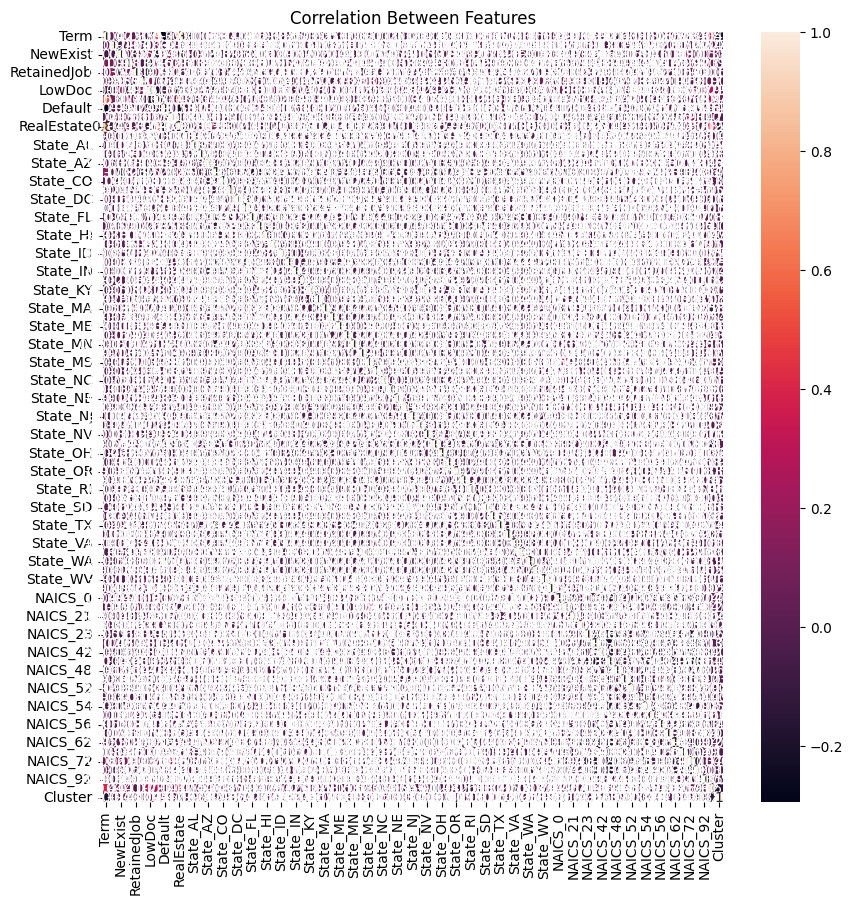

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)
plt.title('Correlation Between Features')

### Deploy Model

In [31]:
# Pickle
import pickle

# Assuming you have a trained model stored in the variable 'model'
# Save the model as a pickle file
with open('model_fixed.pickle', 'wb') as file:
    pickle.dump(model_7, file)

In [38]:
with open('model_7_rev.pickle', 'wb') as file:
    pickle.dump(model_7_rev, file)

In [32]:
from tensorflow.keras.models import save_model

# Assuming you have a trained model stored in the variable 'model'
# Save the model as a .h5 file
save_model(model_7, 'model_fixed.h5')

In [12]:
# Load the pickled model from file
import pickle
with open('model_fixed.pickle', 'rb') as f:
    model_fixed = pickle.load(f)

In [13]:
# Load the pickled model from file
with open('pre_process_scaler.pkl', 'rb') as f:
    scaler_fixed = pickle.load(f)

In [14]:
X_prod_new

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,HasFranchise,RealEstate,...,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,SBA Coverage
66769,60.0,40.0,1.0,0.0,0.0,1.0,1,56000.0,0,0,...,0,0,0,0,0,0,0,0,0,80.0
181036,12.0,1.0,1.0,0.0,1.0,2.0,0,5000.0,0,0,...,1,0,0,0,0,0,0,0,0,85.0
288727,57.0,7.0,1.0,2.0,7.0,1.0,0,285000.0,0,0,...,0,0,0,0,1,0,0,0,0,75.0
296169,120.0,3.0,1.0,1.0,2.0,1.0,0,112000.0,0,0,...,1,0,0,0,0,0,0,0,0,85.0
128082,12.0,10.0,1.0,10.0,10.0,1.0,0,15000.0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,30.0,3.0,2.0,0.0,3.0,2.0,0,123000.0,0,0,...,0,0,0,0,0,0,1,0,0,75.0
240398,104.0,21.0,2.0,0.0,0.0,2.0,0,204000.0,1,0,...,0,0,0,0,0,0,1,0,0,75.0
18897,84.0,2.0,2.0,8.0,2.0,1.0,0,25000.0,0,0,...,0,0,0,0,0,0,0,1,0,85.0
67551,240.0,5.0,1.0,0.0,5.0,2.0,0,118000.0,0,1,...,0,0,0,0,0,0,0,1,0,100.0


In [15]:
y_prod_new

66769     0
181036    1
288727    1
296169    0
128082    0
         ..
3772      1
240398    1
18897     0
67551     0
147685    0
Name: Default, Length: 90, dtype: int64

In [16]:
X_prod_new.columns

Index(['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural',
       'LowDoc', 'DisbursementGross', 'HasFranchise', 'RealEstate', 'State_AK',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_WV', 'State_WY', 'NAICS_0', 'NAICS_11', 'NAICS_21', 'NAICS_22',
       'NAICS_23', 'NAICS_31', 'NAICS_42', 'NAICS_44', 'NAICS_48', 'NAICS_51',
       'NAICS_52', 'NAICS_53', 'NAICS_54', 'NAICS_55'

In [21]:
X_prod_new.values[0]

array([6.0e+01, 4.0e+01, 1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 1.0e+00,
       5.6e+04, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 8.0e+01])

In [22]:
test_data = X_prod_new.values[0]
test_data_2d = test_data.reshape(1, -1)
scaled_test_data = scaler_fixed.transform(test_data_2d)
scaled_test_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.64185801,  0.53905358, -0.65354252, -0.25085885, -0.30606854,
        -0.40897617,  2.66293051, -0.49760058, -0.28331171, -0.4460167 ,
        -0.03880818, -0.08809879, -0.08169743, -0.14266863, -0.41858942,
        -0.14642727, -0.12037764, -0.05043045, -0.04980419, -0.23651161,
        -0.16289289, -0.07014183, -0.10823353, -0.0932428 , -0.18034064,
        -0.13229191, -0.10409125, -0.09353072, -0.10922877, -0.17433083,
        -0.13238588, -0.08055735, -0.15759375, -0.16878093, -0.14368208,
        -0.10197186, -0.08889836, -0.136935  , -0.0743093 , -0.08709632,
        -0.11327866, -0.17225709, -0.07502502, -0.09226798, -0.24531905,
        -0.18784517, -0.10996956, -0.10418554, -0.21431311, -0.10083541,
        -0.08288101, -0.06133197, -0.10309629,  3.36325542, -0.13096976,
        -0.13018955, -0.0673192 , -0.15450854, -0.15489926, -0.05833974,
        -0.05128508,  4.47624731, -0.10223609, -0.0468064 , -0.02649434,
        -0.27295542, -0.31537553, -0.25039666, -0.4

In [ ]:
predict_data = model_fixed.predict(scaled_test_data)
print(predict_data)

In [23]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.12.0
Keras version: 2.12.0
